# Rice Leaf Disease Detection Model

This Convolutional Neural Network (CNN) model is designed to classify rice leaf diseases into three distinct categories: 
* `Leaf Smut`
* `Brown Spot`
* `Bacterial Leaf Blight`

Convolutional Neural Networks (CNNs) are specialized neural networks that excel in image recognition and classification tasks. CNNs are particularly useful for detecting diseases like Leaf Smut, Brown Spot, and Bacterial Leaf Blight in rice leaves by learning patterns from images.

CNNs consist of convolutional layers that extract features, pooling layers that reduce dimensionality, and fully connected layers for classification. The architecture leverages the 2D structure of images, allowing the model to capture important features while remaining translation-invariant.

CNNs are efficient and easier to train than traditional fully connected networks, making them a powerful tool for detecting rice leaf diseases with fewer parameters and improved accuracy.


# 1. Data Analysis
## Description of disease and impact:
* `Leaf Smut`: Leaf Smut is a fungal disease caused by the pathogen Ustilaginoidea virens. This disease is characterized by the appearance of small, black, smut-like lesions or spots on the rice leaves, often forming in clusters. These black lesions eventually cause the infected tissue to become necrotic (dead), leading to reduced photosynthesis. As the disease progresses, it can lead to significant yield loss if not controlled. Leaf smut primarily affects the leaves, but in severe cases, it can also affect the panicles, resulting in malformed grains. Environmental conditions like high humidity and moderate temperatures favor the growth and spread of this fungal pathogen.

  Impact : Reduces photosynthesis, weakens the plant, and may lead to yield loss if severe.

* `Brown Spot`: Brown Spot is caused by the fungal pathogen Cochliobolus miyabeanus. This disease manifests as circular or oval brown lesions with dark borders on the rice leaves. The spots may have a yellow halo, and the infected leaves become weakened, leading to premature leaf drying. Brown Spot can cause significant damage by reducing the plant's ability to photosynthesize, thus hindering growth and grain production. The disease thrives in areas with high humidity and poor soil conditions, often spreading rapidly during the rainy season. Brown Spot can also infect the rice stems and panicles in severe cases, leading to overall plant health deterioration.

  Impact : Weakens the plant by reducing leaf function and yields poor-quality rice.

* `Bacterial Leaf Blight`: Bacterial Leaf Blight (BLB) is caused by the bacterium Xanthomonas oryzae pv. oryzae. The disease is characterized by yellowing and wilting of the rice leaves, starting from the leaf tips and progressing downward. The infection initially appears as water-soaked lesions, which later turn yellow and dry up, causing significant tissue damage. The bacteria infect the plant through the leaf stomata, and the disease is particularly damaging under high humidity, excessive rainfall, and warm temperatures. BLB can severely reduce rice yields as it impairs the plant's ability to conduct photosynthesis and leads to the premature death of affected leaves. In severe cases, the entire plant can be affected, with the disease spreading from the leaves to the stem and panicle, reducing grain production and quality.

  Impact : Severe infections can cause wilting, stunted growth.

## Dataset Overview:
In this dataset, the images are categorized into three types of rice leaf diseases:

* Leaf Smut: 39 images
* Brown Spot: 40 images
* Bacterial Leaf Blight: 40 images

This data will be used to train the Convolutional Neural Network (CNN) model, allowing it to learn the visual patterns and characteristics associated with each disease type. The distribution of images across these categories ensures that the model can be trained to differentiate between these diseases based on the unique features observed in the leaf images.






# 2. Importing Dependencies

In [40]:
import numpy as np # We used numpy for handling numerical data and image arrays
import tensorflow as tf # We used Tensorflow for building, training, and evaluating neural networks.
import matplotlib.pyplot as plt # We used this for visualisation of accuracy and loss.
from tensorflow import keras # Keras was used to predefine the layers and filters.
import cv2 # Used for image processing, resizing, transforming and feeding images to the model.
import os # Used for accessing the dataset and saving model weights.
import warnings
warnings.filterwarnings('ignore')  # To ignore all warnings


# 3. Loading Images and Labeling Diseases

In [42]:
# Assigning variable for image path
dataset_path = r"D:\Certified Data Science\Intersnhip\Project 1\Data"

In [43]:
# Mapping each disease with numbers
class_mapping = {"Bacterial leaf blight": 0, "Brown spot": 1, "Leaf smut": 2}

In [44]:
# Creating empty list to store images and labels
data = []
labels = []


# 4. Image Processing

In [46]:
# Defining a function to fetch image and pre-process it
def load_images_from_folder(folder_path, class_label):
    images = os.listdir(folder_path)
    for img_name in images:
        image_path = os.path.join(folder_path, img_name)  
        img = cv2.imread(image_path) # Path for reading a single image
        img = cv2.resize(img, (128, 128))  # Resize to 128x128
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert to RGB
        data.append(img) # Processed image is appended to the data list created above.
        labels.append(class_label) # label for processed image is stored in the labels list.


In [47]:
for class_name, label in class_mapping.items():
    folder_path = os.path.join(dataset_path, class_name)
    if os.path.exists(folder_path):
        load_images_from_folder(folder_path, label)
    else:
        print("Not Found")

In [48]:
data = np.array(data, dtype="float32") / 255.0  # Rescale the Images by Dividing Every Pixel in Every Image by 255
labels = np.array(labels)


# 5. Splitting Data into Training and Testing

In [50]:
from sklearn.model_selection import train_test_split

In [51]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42) # For training the data selected was 80% and for testing it was 20%

In [52]:
X_train.shape

(95, 128, 128, 3)

In [53]:
X_test.shape

(24, 128, 128, 3)

In [54]:
y_test.shape

(24,)

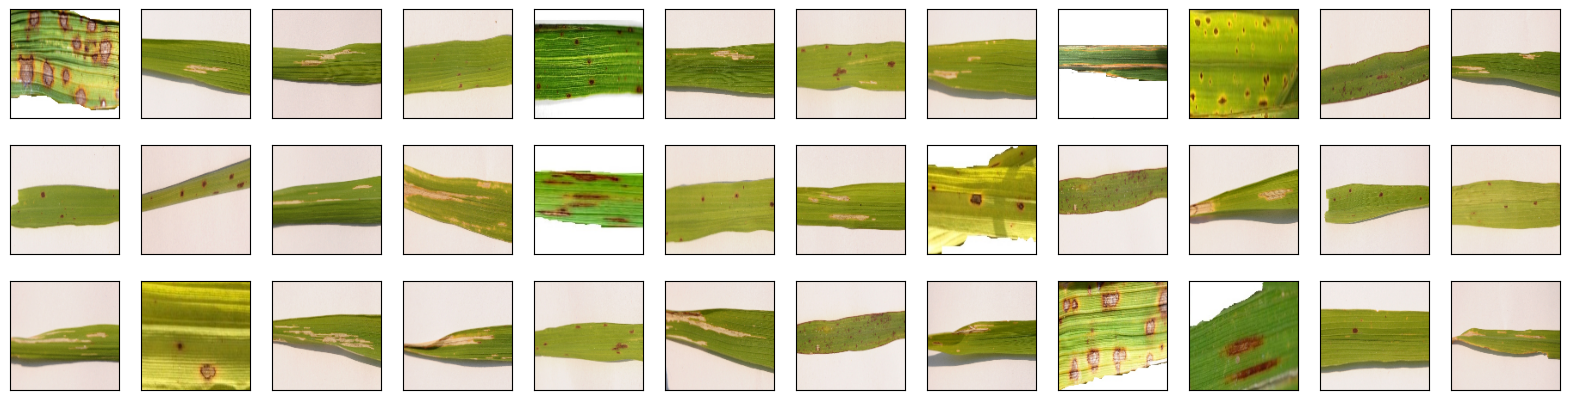

In [125]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure(figsize=(20,5)) #Canvas
plotnumber=1
for i in range(36):
    ax = fig.add_subplot(3, 12, plotnumber, xticks=[], yticks=[])
    ax.imshow(X_train[i])
    plotnumber+=1

# 6.Building Model

In [56]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(128, 128, 3)), # This layer detects basic edges and textures.
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)), # Reduces dimensions, keeping key edge features.

    tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'), # This layer learns more detailed patterns.
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)), # Further downsamples, retaining important patterns.

    tf.keras.layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu'), # Captures complex disease-related features.
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)), # Extracts high-level features while reducing computation.

    tf.keras.layers.Flatten(), # Converts the 2D feature maps into a 1D vector to feed into the fully connected layers.
    tf.keras.layers.Dense(units=128, activation='relu'), # The first Dense layer (with ReLU) processes information, while the final Dense layer (with softmax) outputs class probabilities.
    tf.keras.layers.Dropout(rate=0.5), # Randomly drops a fraction of neurons (here, 50%) during training to prevent overfitting.
    tf.keras.layers.Dense(units=3, activation='softmax')  # 3 classes
])

In [57]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics=['accuracy']) 
# model.compile() function sets up how the CNN will learn
# Optimizer efficiently updates model weights using adaptive learning rates
# loss is used for multi-class classification when labels are integers (not one-hot encoded).
# metrics tracks model performance by measuring how often predictions match true labels.

In [58]:
model.summary() # It provides a structured summary of CNN model like 
                # Layer (type):all layers in order (Conv2D, MaxPooling2D, Flatten, Dense, etc.),
                # Output Shape: the dimensions of data at each layer, 
                #  Parameters: Indicates trainable and non-trainable parameters in the model

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 28, 28, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       3,211,392 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 3)                   │             387 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,305,027 (12.61 MB)

 Trainable params: 3,305,027 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

In [59]:
history = model.fit(X_train, y_train, epochs=30, batch_size=32, validation_data=(X_test, y_test))
# model.fit() function trains the CNN on our dataset.
# X_train, y_train:Training data (images & labels).
# epochs=30: The model goes through the entire dataset 30 times for learning.
# batch_size=32: The model processes 32 images at a time before updating weights.
# validation_data=(X_test, y_test): Evaluates performance on test data after each epoch.

Epoch 1/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 851ms/step - accuracy: 0.2919 - loss: 1.3818 - val_accuracy: 0.3750 - val_loss: 1.1458
Epoch 2/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 679ms/step - accuracy: 0.3940 - loss: 1.1060 - val_accuracy: 0.5833 - val_loss: 1.0447
Epoch 3/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 524ms/step - accuracy: 0.5093 - loss: 1.0522 - val_accuracy: 0.5000 - val_loss: 0.9840
Epoch 4/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 568ms/step - accuracy: 0.5079 - loss: 0.9917 - val_accuracy: 0.6250 - val_loss: 0.9288
Epoch 5/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 515ms/step - accuracy: 0.6100 - loss: 0.8886 - val_accuracy: 0.6250 - val_loss: 0.8382
Epoch 6/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 508ms/step - accuracy: 0.5773 - loss: 0.8469 - val_accuracy: 0.7917 - val_loss: 0.7369
Epoch 7/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 558ms/step - accuracy: 0.6322 - loss: 0.8037 - val_accuracy: 0.7917 - val_loss: 0.6857
Epoch 8/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 538ms/step - accuracy: 0.6570 - loss: 0.8000 - val_accuracy: 0.7500 - val_loss:

# 7. Training and Validation Accuracy

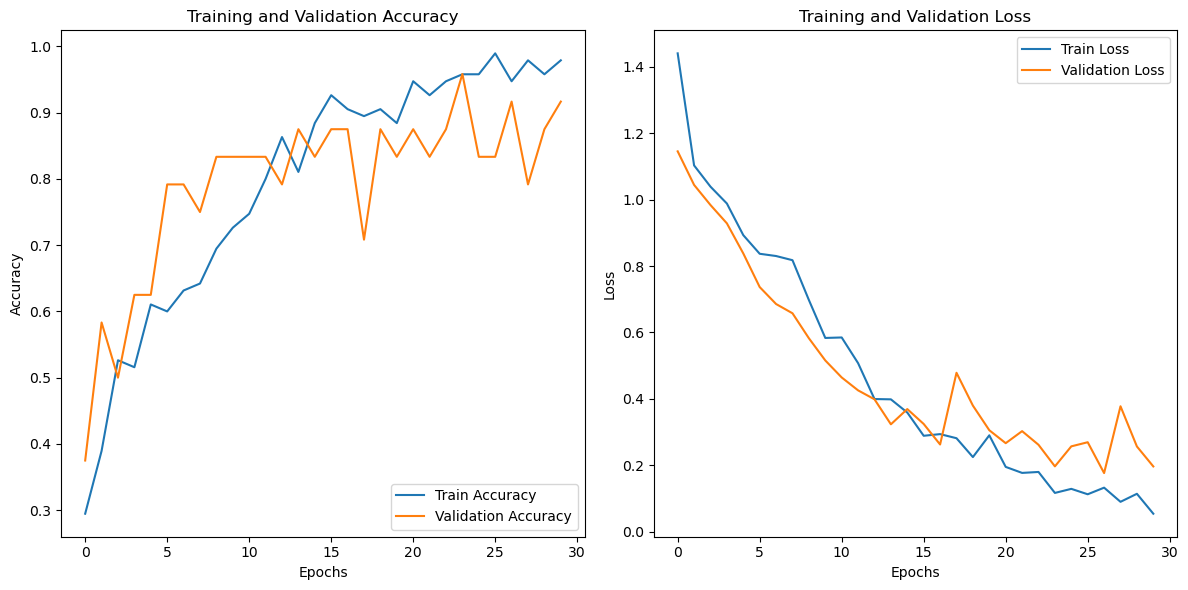

In [61]:
plt.figure(figsize=(12, 6))

# Accuracy Plot
plt.subplot(1, 2, 1) # Prepares the first subplot (for accuracy) in a 1-row, 2-column layout
plt.plot(history.history['accuracy'], label='Train Accuracy') # Plots training accuracy over epochs.
plt.plot(history.history['val_accuracy'], label='Validation Accuracy') # Plots validation accuracy.
plt.title('Training and Validation Accuracy') # Sets the plot title.
plt.xlabel('Epochs') # Labels the axes
plt.ylabel('Accuracy') 
plt.legend(loc='lower right') # Adds a legend to differentiate training and validation curves.

# Loss Plot
plt.subplot(1, 2, 2) # Creates the second subplot for loss in a 1-row, 2-column layou
plt.plot(history.history['loss'], label='Train Loss') # Plots the training loss over epochs.
plt.plot(history.history['val_loss'], label='Validation Loss') # Plots the validation loss over epochs.
plt.title('Training and Validation Loss') 
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc='upper right')

plt.tight_layout() # Adjusts spacing to prevent overlap between subplots
plt.show() # Displays the plots.

# 8. Data Augmentation
Data augmentation is a technique used in machine learning, particularly in computer vision, to artificially increase the size and diversity of a dataset by applying various transformations to the existing data. These transformations allow the model to see different variations of the data, which can help improve the model's ability to generalize and prevent overfitting.

### Key Reasons for Using Data Augmentation:

* Increases Dataset Size: By generating new, unique data from existing data, it simulates a larger dataset, which is useful if you have limited data.
* Prevents Overfitting: The model is exposed to a wider variety of variations, preventing it from memorizing the training data (overfitting) and helping it generalize better to new, unseen data.
* Improves Model Generalization: The model learns to recognize features in different orientations, sizes, lighting conditions, etc., making it more robust to real-world variability.

### Common Data Augmentation Techniques in Image Data:

* Rotation: Rotate images by a certain angle.
* Flipping: Horizontally or vertically flip images.
* Zooming: Zoom in or zoom out on the image.
* Shifting: Translate (shift) images horizontally or vertically.
* Shearing: Apply a shear transformation that distorts the image.
* Cropping: Randomly crop sections of the image.
* Brightness/Contrast Adjustments: Randomly adjust the brightness or contrast of the image.
* Noise Injection: Add random noise to the image.
* Color Jittering: Randomly change properties such as brightness, contrast, and saturation.

### Why Data Augmentation is Important:
* Improves Performance: It helps the model recognize patterns more robustly across different variations.
* Reduces the Need for More Data: In many cases, collecting more data is expensive or time-consuming, so augmentation allows you to generate more data from your existing dataset.
* Enables Robust Training: The model is less likely to memorize the training data and more likely to generalize well to new examples.
### Data Augmentation Report:
The model that was compiled without augmenting the data had an accuracy of 97% and a validation accuracy of 91%. After augmenting the data with the below-mentioned parameters, the model gave an accuracy of 91% as well as a validation accuracy of 75%. The parameters we used were:

rotation_range=5→ Rotates images randomly by up to 5 degrees.

width_shift_range=0.01 → Shifts images horizontally by up to 1% of width.

height_shift_range=0.01 → Shifts images vertically by up to 1% of height.

shear_range=0.01 → Applies shearing transformation (distorts shape slightly).

zoom_range=0.01 → Randomly zooms in/out by 1%.

horizontal_flip=True → Randomly flips images horizontally.

fill_mode='nearest' → Fills missing pixels with nearest neighbour values.)

In [63]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
    rotation_range=5,
    width_shift_range=0.01,
    height_shift_range=0.01,
    shear_range=0.01,
    zoom_range=0.01,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [64]:
model1 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(128, 128, 3)), # This layer detects basic edges and textures.
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)), # Reduces dimensions, keeping key edge features.

    tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'), # This layer learns more detailed patterns.
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)), # Further downsamples, retaining important patterns.

    tf.keras.layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu'), # Captures complex disease-related features.
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)), # Extracts high-level features while reducing computation.

    tf.keras.layers.Flatten(), # Converts the 2D feature maps into a 1D vector to feed into the fully connected layers.
    tf.keras.layers.Dense(units=128, activation='relu'), # The first Dense layer (with ReLU) processes information, while the final Dense layer (with softmax) outputs class probabilities.
    tf.keras.layers.Dropout(rate=0.5), # Randomly drops a fraction of neurons (here, 50%) during training to prevent overfitting.
    tf.keras.layers.Dense(units=3, activation='softmax') ])

In [65]:
model1.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics=['accuracy']) 

In [66]:
model1.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 28, 28, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │       3,211,392 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 3)                   │             387 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,305,027 (12.61 MB)

 Trainable params: 3,305,027 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

In [67]:
history1 = model1.fit(datagen.flow(X_train, y_train, batch_size=32), epochs=30, validation_data=(X_test, y_test))

Epoch 1/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 714ms/step - accuracy: 0.3483 - loss: 1.2648 - val_accuracy: 0.3333 - val_loss: 1.1294
Epoch 2/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 597ms/step - accuracy: 0.2760 - loss: 1.1622 - val_accuracy: 0.3333 - val_loss: 1.0797
Epoch 3/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 533ms/step - accuracy: 0.4210 - loss: 1.0573 - val_accuracy: 0.6667 - val_loss: 1.0126
Epoch 4/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 687ms/step - accuracy: 0.4518 - loss: 1.0417 - val_accuracy: 0.5833 - val_loss: 0.9359
Epoch 5/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 603ms/step - accuracy: 0.4659 - loss: 1.0442 - val_accuracy: 0.6250 - val_loss: 0.8710
Epoch 6/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 624ms/step - accuracy: 0.6831 - loss: 0.8707 - val_accuracy: 0.6250 - val_loss: 0.7866
Epoch 7/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 513ms/step - accuracy: 0.5262 - loss: 0.8713 - val_accuracy: 0.7917 - val_loss: 0.7378
Epoch 8/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 611ms/step - accuracy: 0.6609 - loss: 0.8470 - val_accuracy: 0.6667 - val_loss:

# 9.Saving the Model

In [101]:
model.save("model.h5")



# 10.Visualize Some Predictions

In [105]:
labels = ["Bacterial Leaf Blight", "Brown Spot", "Leaf Smut"]

In [103]:
pred = model.predict(X_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 360ms/step


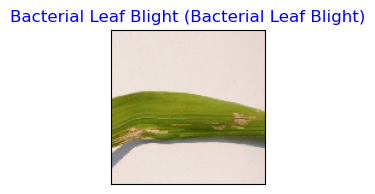

In [121]:

img_index = 4


fig = plt.figure(figsize=(5, 2))
ax = fig.add_subplot(1, 1, 1, xticks=[], yticks=[])


ax.imshow(X_test[img_index])


pred_i = np.argmax(pred[img_index])  # Predicted class
true_i = np.argmax(y_test[img_index])  # Actual class


ax.set_title("{} ({})".format(labels[pred_i], labels[true_i]),
             color=("blue" if pred_i == true_i else "red"))

plt.show()


# 11.Test Accuracy

In [127]:
score = model.evaluate(X_test, y_test, verbose=0)
accuracy = 100*score[1]
loss = 100*score[0]

# print test accuracy
print('Test accuracy: %.4f%%' % accuracy)
print('Test loss:', loss)

Test accuracy: 91.6667%
Test loss: 19.639672338962555


# 12. Challenges
In this project, we encountered a variety of challenges that required thoughtful solutions and adjustments to ensure the successful development of the CNN model for rice leaf disease detection.

* Data Collection and Labeling Errors:


While organizing the dataset, we noticed some images in the class folders that were either not correctly labeled or could not be loaded due to file corruption.We implemented a function to verify that each image was readable and could be resized correctly. We also reviewed the labeling system to ensure that each folder was accurately mapped to its respective class (i.e., Bacterial leaf blight, Brown spot, Leaf smut).

* Choosing the Right Architecture:


Deciding on the CNN architecture for the task was difficult due to the lack of prior knowledge about how deep the network should be and what layers would be most effective for rice leaf disease detection.We started with a simple architecture with a few convolutional layers, increasing the number of filters gradually. After evaluating the performance, we refined the architecture by adding more layers, including dropout to avoid overfitting, and adjusted the number of neurons in the dense layers.

* Overfitting:

Despite using a small dataset, the model began to overfit, showing high accuracy on the training set but poor generalization to the validation set.
To counter this, we added dropout layers and early stopping. This helped the model generalize better and reduced the risk of memorizing the training data.
